In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\verma\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#loading the data
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#number of rows and columns
df.shape

(1338, 7)

In [5]:
#getting informaton about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#checking for duplicate values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
#checking statistical values
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

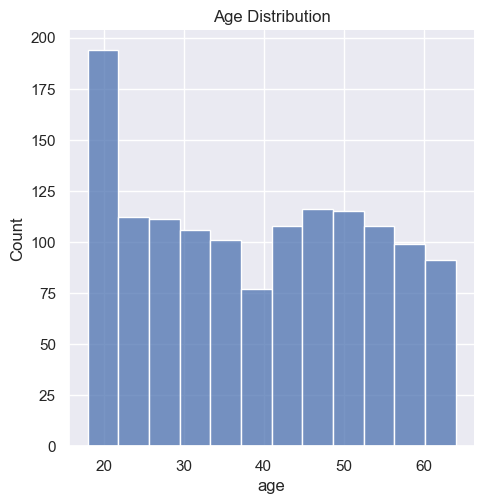

In [9]:
#distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df["age"])
plt.title("Age Distribution")
plt.show()

In [10]:
#most of the people in age column are of age 20

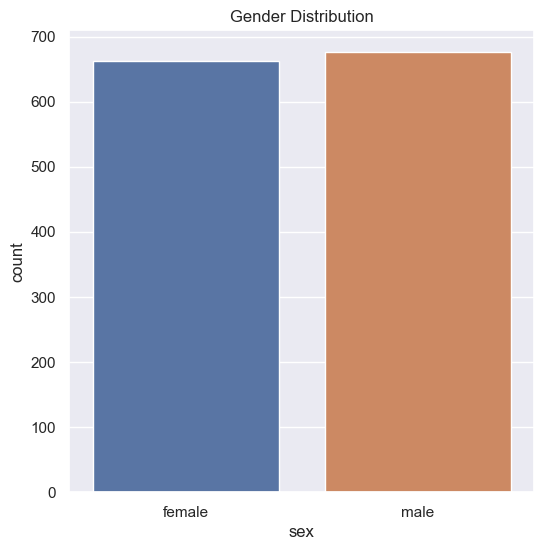

In [11]:
#distribution of sex column
plt.figure(figsize=(6,6))
sns.countplot(df["sex"])
plt.title("Gender Distribution")
plt.show()

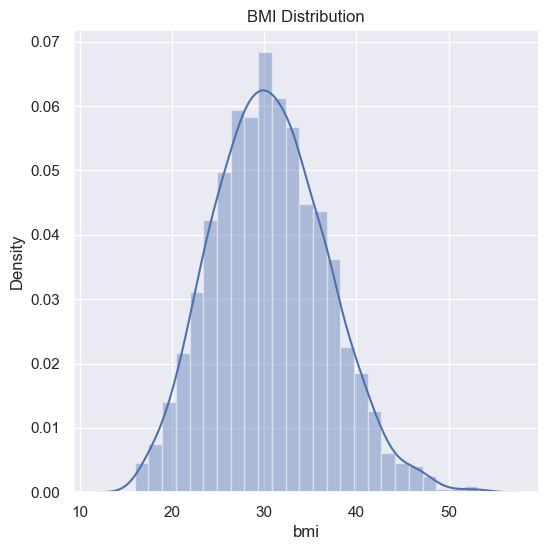

In [12]:
#distribution of bmi column
plt.figure(figsize=(6,6))
sns.distplot(df["bmi"])
plt.title("BMI Distribution")
plt.show()

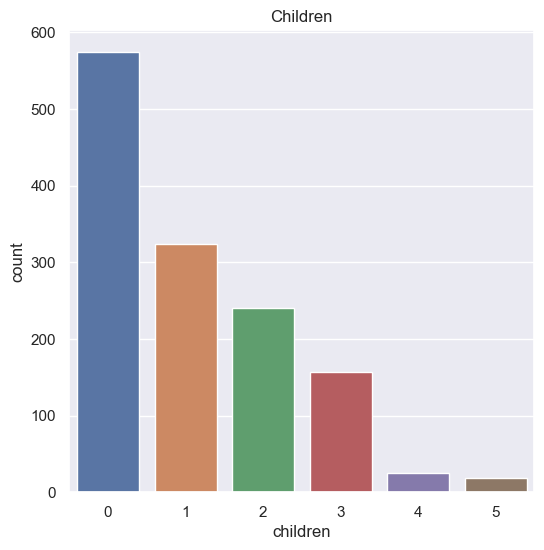

In [13]:
#distribution of children column
plt.figure(figsize=(6,6))
sns.countplot(df["children"])
plt.title("Children")
plt.show()

In [14]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

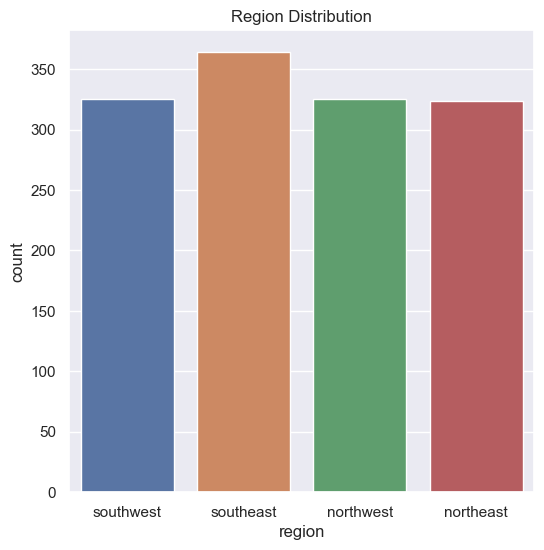

In [15]:
#distribution of region column
plt.figure(figsize=(6,6))
sns.countplot(df["region"])
plt.title("Region Distribution")
plt.show()

<Figure size 600x600 with 0 Axes>

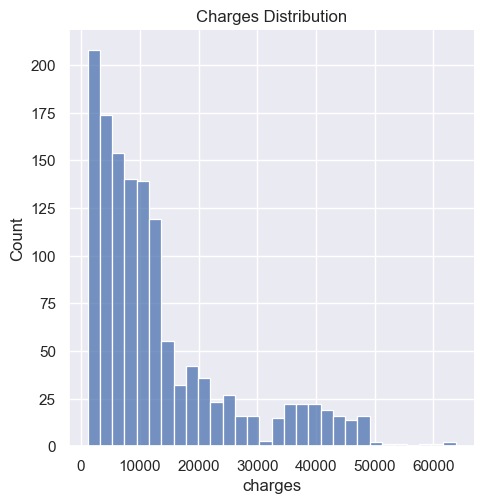

In [16]:
#distribution of charges column
plt.figure(figsize=(6,6))
sns.displot(df["charges"])
plt.title("Charges Distribution")
plt.show()

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df.replace({'sex':{'male':0,'female':1}}, inplace = True)
df.replace({'smoker':{'yes':0,'no':1}}, inplace = True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace = True)

In [19]:
x = df.drop (columns="charges" , axis =1)
y = df['charges']

In [20]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [21]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [39]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=222)

In [40]:
#importing the Model 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xtrain,ytrain)
ypred = linreg.predict(xtest)

In [41]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
print(f"ACCURACY IS {r2}")

ACCURACY IS 0.7866991817223289


In [42]:
def makeprediction():
    age = int(input("ENTER YOUR AGE :"))
    sex = input("ENTER YOUR GENDER(IF MALE:0,FEMALE:1): ")
    bmi = float(input("ENTER YOUR BMI(BODY MASS INDEX) : "))
    children = int(input("ENTER NUMBER OF CHILDRENS :"))
    smoker  = input("DO YOU SMOKE(IF YES:0 or NO:1) :")
    region = input("ENTER YOUR REGION(IF SOUTHEAST:0,SOUTHWEST:1,NORTHEAST:2,NORTHWEST:3): ")
    newob=[[age,sex,bmi,children,smoker,region]]
    input_as_numpyarray = np.asarray(newob)
    input_datareshaped = input_as_numpyarray . reshape(1,-1)
    
    
    yp = linreg.predict(newob)
    yp = int(yp)
 
    print(f"COST OF YOUR MEDICAL INSURSNCE IS $ {yp}")

In [43]:
makeprediction()

ENTER YOUR AGE :19
ENTER YOUR GENDER(IF MALE:0,FEMALE:1): 1
ENTER YOUR BMI(BODY MASS INDEX) : 27.9
ENTER NUMBER OF CHILDRENS :0
DO YOU SMOKE(IF YES:0 or NO:1) :0
ENTER YOUR REGION(IF SOUTHEAST:0,SOUTHWEST:1,NORTHEAST:2,NORTHWEST:3): 1
COST OF YOUR MEDICAL INSURSNCE IS $ 25206
